In [ ]:
import numpy as np
import pandas as pd
import random
from OccupancySimulator_OfficeRoom import OccupancySimulator

## Simulate 1 day (Example)

In [ ]:
osim = OccupancySimulator(maxOccupants=3)
osim.simulation_days=1
osim.seed_value = 42
osim.apply = ["lightswitch-2002_variational",
              "random_moving_wang_2011",
              "wob_markov_chain"]
osim.run()
osim.df[['Occupants', 'WindowState']].plot()

## Simulate 1000 days for four room types

Simulates 1000 working days for four times, considering a 1-4 person office

In [ ]:
df = pd.DataFrame()

for i in range(1, 5):
    
        maxOccupants = i
        
        print("index: {}, min occupants: {}, max occupants: {} -> run simulation".format(i, 1, maxOccupants))
        # simulate
        osim = OccupancySimulator(maxOccupants=maxOccupants, 
                                  simulation_days=1000,
                                  seed_value=i)
        osim.apply = ["lightswitch-2002_variational",
                      "random_moving_wang_2011",
                      "wob_markov_chain"]
        osim.run()
        
        osim.df['simID'] = i
        osim.df['maxOccupants'] = maxOccupants
        # save
        df = df.append(osim.df, ignore_index=True)
        print("________________")


## Partly window opening

Inserts a random number between 0.01 and 1.0 as a fraction of the window opening for each opening period

In [ ]:
df['WindowOpeningFraction'] = 0
changes = df['WindowState'].diff()[df['WindowState'].diff() != 0].index.values[1:]
if len(changes) % 2 != 0: 
    # if window is not closed at the end of the dataset use last index as last closing action
    changes = np.append(changes, len(df)-1)
opening_periods = changes.reshape(-1, 2)
for p in opening_periods: # opening fraction is randomly picked between 0.01 and 1.0
    df.loc[p[0]:p[1]-1, 'WindowOpeningFraction'] = round(random.uniform(0.01, 1.0), 2)

## Simulation result

<AxesSubplot:>

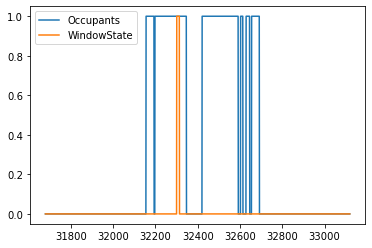

In [5]:
day = 23 # example day
df.loc[df.simID == 1, ['Occupants', 'WindowState']][1440 * (day-1) : 1440 * day].plot()

In [6]:
print("Simulated days:", int(len(df) / 1440))
print("Max number of occupants:", df.Occupants.max())
print("Presence rate:", round(df.Occupancy.sum() / len(df), 4))
print("Mean number of occupants during presence:", round(df.Occupants.sum() / df.Occupancy.sum(), 4))
print("Mean window openings per day:", round((df.WindowState > df.WindowState.shift(axis=0)).sum(axis=0) / (len(df) / 1440), 4))
print("Open window rate:", round(df.WindowState.sum() / len(df), 4))

Simulated days: 4000
Max number of occupants: 4
Presence rate: 0.4066
Mean number of occupants during presence: 1.633
Mean window openings per day: 1.4068
Open window rate: 0.011


## Save simulated data

In [7]:
df.head()

,Datetime,Date,Timestamp,Occupants,Occupancy,WindowState,simID,maxOccupants,WindowOpeningFraction
0,2023-01-01 00:00:00,2023-01-01,1.672531e+09,0,0,0,1,1,0.0
1,2023-01-01 00:01:00,2023-01-01,1.672531e+09,0,0,0,1,1,0.0
2,2023-01-01 00:02:00,2023-01-01,1.672531e+09,0,0,0,1,1,0.0
3,2023-01-01 00:03:00,2023-01-01,1.672531e+09,0,0,0,1,1,0.0
4,2023-01-01 00:04:00,2023-01-01,1.672531e+09,0,0,0,1,1,0.0


In [8]:
df.drop(columns=['simID'], inplace=True)
df.to_csv("simulated_occupancy_office_rooms.csv", index=False)

## Show data

<AxesSubplot:>

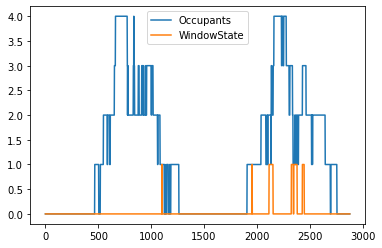

In [9]:
maxOccupants = 4
number_of_days = 7

days_in_df = len(df.loc[df.maxOccupants == maxOccupants]) / 1440
df_week = pd.DataFrame()
for d in range(0, number_of_days):
    day = random.randint(1, days_in_df)
    df_week = df_week.append(df.loc[df.simID == maxOccupants, ['Occupants', 'WindowState']][1440 * (day-1) : 1440 * day], ignore_index = True)
    
df_week[:2880].plot()